# Continuous Probabilistic Methods

## Using lemonade.csv dataset and focusing on continuous variables:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
lemonade = pd.read_csv('lemonade.csv')
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


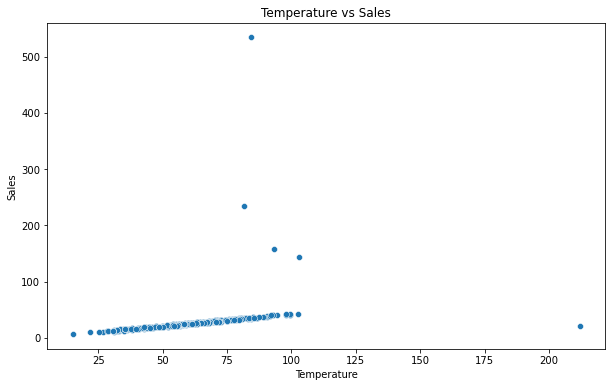

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Sales', data=lemonade)
plt.title('Temperature vs Sales')
plt.show()

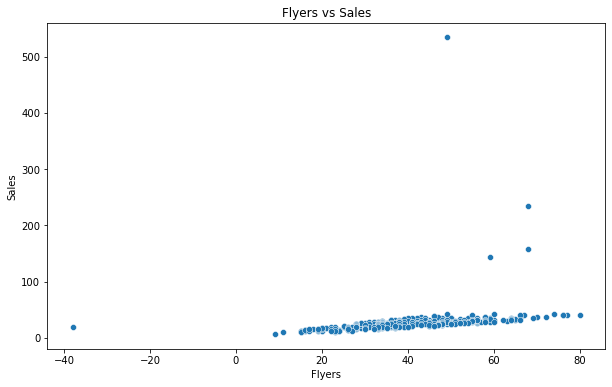

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Flyers', y='Sales', data=lemonade)
plt.title('Flyers vs Sales')
plt.show()

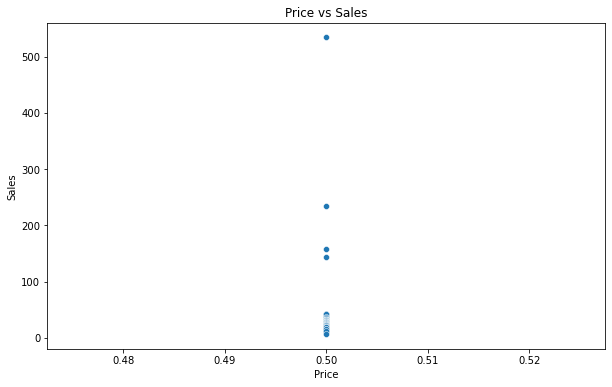

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Sales', data=lemonade)
plt.title('Price vs Sales')
plt.show()

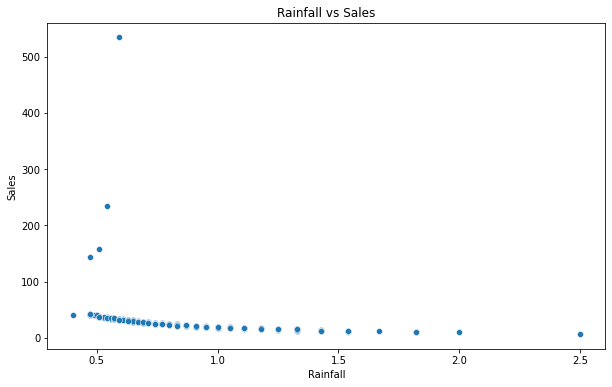

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rainfall', y='Sales', data=lemonade)
plt.title('Rainfall vs Sales')
plt.show()

In [8]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [9]:
lemonade.Date = pd.to_datetime(lemonade.Date) 

In [10]:
lemonade['month'] = lemonade.Date.dt.month_name()

In [14]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
1,2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


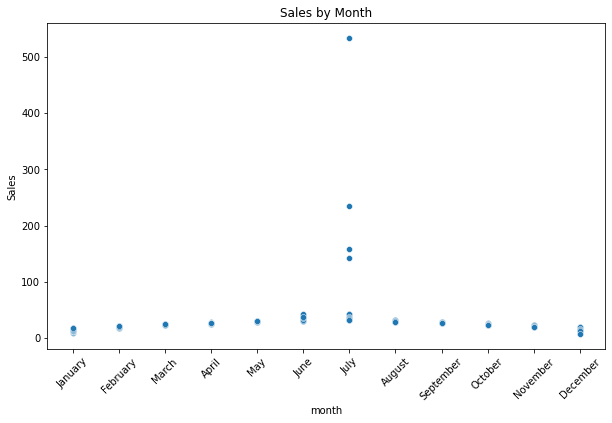

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='month', y='Sales', data=lemonade)
plt.title('Sales by Month')
plt.xticks(rotation=45)
plt.show()

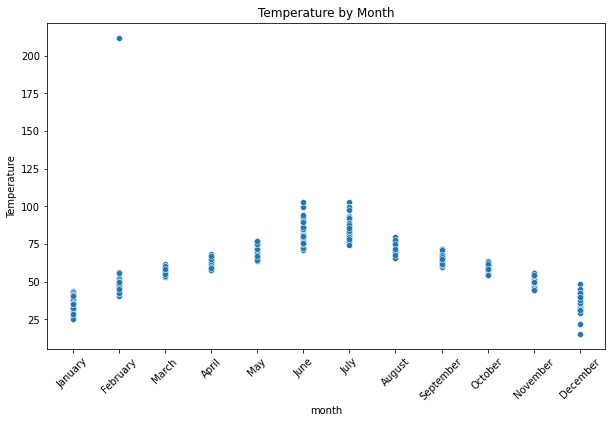

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='month', y='Temperature', data=lemonade)
plt.title('Temperature by Month')
plt.xticks(rotation=45)
plt.show()

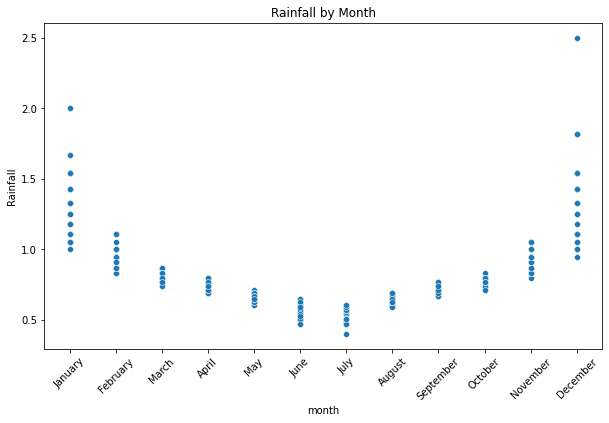

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='month', y='Rainfall', data=lemonade)
plt.title('Rainfall by Month')
plt.xticks(rotation=45)
plt.show()

Date


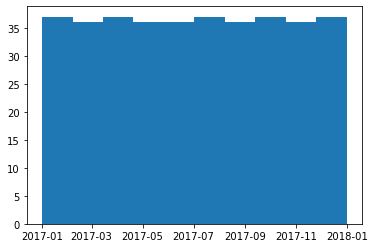

Day


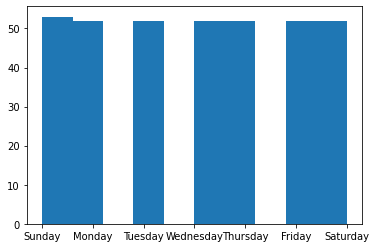

Temperature


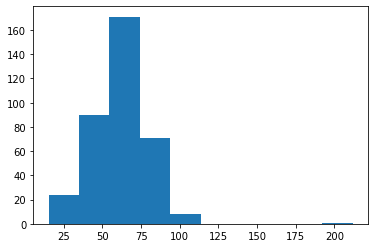

Rainfall


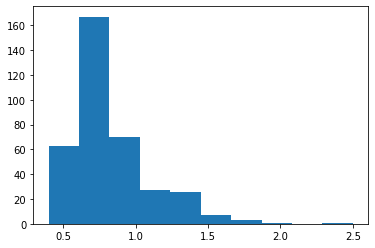

Flyers


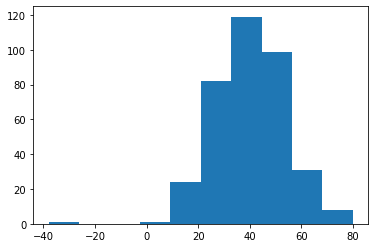

Price


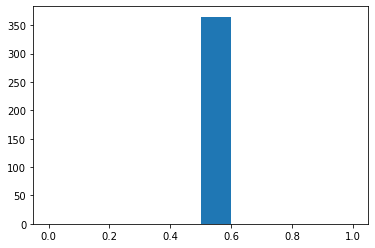

Sales


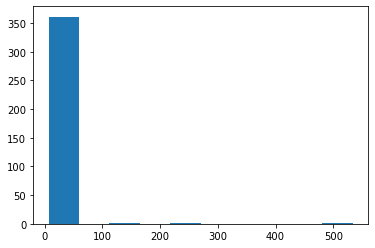

month


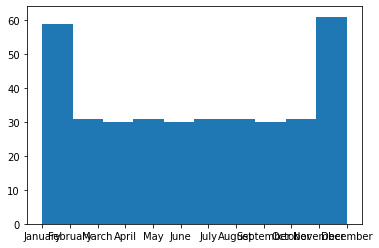

In [25]:
for col in lemonade.columns:
    print(col)
    plt.hist(lemonade[col])
    plt.show()

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [30]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
 7   month        365 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 22.9+ KB


In [11]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = lemonade.Temperature.quantile(0.25)
q3 = lemonade.Temperature.quantile(0.75)
q1, q3

(49.7, 71.7)

In [12]:
iqr = q3 - q1
iqr

22.0

In [58]:
def get_lower_and_upper_bounds(df, column_list, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    # New DF for storing the results:
    bounds = pd.DataFrame(columns=['column_name', 'lower_bound', 'upper_bound'])
    
    for col in column_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - mult * iqr
        upper_bound = q3 + mult * iqr
        bounds = bounds.append({'column_name': col,
                      'lower_bound': lower_bound,
                      'upper_bound': upper_bound}, ignore_index=True)
    return bounds

In [59]:
column_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
bounds = get_lower_and_upper_bounds(lemonade, column_list, 1.5)
bounds

,column_name,lower_bound,upper_bound
0,Temperature,16.70,104.7
1,Rainfall,0.26,1.3
2,Flyers,4.00,76.0
3,Price,0.50,0.5
4,Sales,5.00,45.0


#### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [61]:
bounds = get_lower_and_upper_bounds(lemonade, column_list, 1.5)
bounds

,column_name,lower_bound,upper_bound
0,Temperature,16.70,104.7
1,Rainfall,0.26,1.3
2,Flyers,4.00,76.0
3,Price,0.50,0.5
4,Sales,5.00,45.0


## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

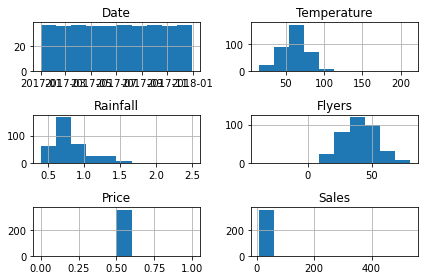

In [68]:
lemonade.hist()
plt.tight_layout()
plt.show()

#### Use a 2 sigma decision rule to isolate the outliers.
Do these make sense?
Should certain outliers be kept or removed?

In [69]:
lemonade['z_score_temperature'] = (lemonade['Temperature'] - lemonade['Temperature'].mean()) / lemonade['Temperature'].std()
lemonade['z_score_flyers'] = (lemonade['Flyers'] - lemonade['Flyers'].mean()) / lemonade['Flyers'].std()

In [70]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month,z_score_temperature,z_score_flyers
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,-1.820927
1,2017-01-02,Monday,28.9,1.33,15,0.5,13,January,-1.787286,-1.820927
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,-1.477652,-0.950507
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,-0.946852,-0.877972
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,-1.040848,-0.515297


In [71]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales,z_score_temperature,z_score_flyers
count,365.000000,365.000000,365.000000,365.0,365.000000,3.650000e+02,3.650000e+02
mean,61.224658,0.825973,40.104110,0.5,27.865753,-1.883425e-15,9.976799e-17
std,18.085892,0.273890,13.786445,0.0,30.948132,1.000000e+00,1.000000e+00
min,15.100000,0.400000,-38.000000,0.5,7.000000,-2.550311e+00,-5.665283e+00
25%,49.700000,0.650000,31.000000,0.5,20.000000,-6.372181e-01,-6.603667e-01
50%,61.100000,0.740000,39.000000,0.5,25.000000,-6.892529e-03,-8.008661e-02
75%,71.700000,0.910000,49.000000,0.5,30.000000,5.791996e-01,6.452636e-01
max,212.000000,2.500000,80.000000,0.5,534.000000,8.336627e+00,2.893849e+00


In [73]:
lemonade[lemonade.z_score_temperature > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month,z_score_temperature,z_score_flyers
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,-0.370227
166,2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251,2.676244
176,2017-06-26,Monday,102.6,0.47,60,0.5,42,June,2.287714,1.443149
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2.304301,1.370614
190,2017-07-10,Monday,98.0,0.49,66,0.5,40,July,2.033372,1.878359
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251,2.603709
202,2017-07-22,Saturday,99.6,0.47,49,0.5,42,July,2.121838,0.645264
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43,July,2.027843,2.458639


In [74]:
lemonade[lemonade.z_score_flyers > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month,z_score_temperature,z_score_flyers
166,2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251,2.676244
170,2017-06-20,Tuesday,85.1,0.54,70,0.5,37,June,1.320109,2.168499
171,2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,1.828792,2.603709
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,1.779030,2.023429
183,2017-07-03,Monday,81.5,0.54,68,0.5,235,July,1.121058,2.023429
194,2017-07-14,Friday,92.0,0.50,80,0.5,40,July,1.701621,2.893849
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251,2.603709
203,2017-07-23,Sunday,89.1,0.51,72,0.5,37,July,1.541275,2.313569
204,2017-07-24,Monday,83.5,0.57,69,0.5,35,July,1.231642,2.095964
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43,July,2.027843,2.458639


## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [75]:
lemonade[lemonade.z_score_temperature > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month,z_score_temperature,z_score_flyers
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,-0.370227


In [ ]:
# The temp of 212 is way above the average and should be imputed or averaged using the day before and after.

In [76]:
lemonade[lemonade.z_score_flyers > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,month,z_score_temperature,z_score_flyers


In [ ]:
# no results